In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime

In [ ]:
covid_df = pd.read_csv("covid_19_india.csv")

In [ ]:
covid_df.head(10)

In [ ]:
covid_df.info()

In [ ]:
covid_df.describe()

In [ ]:
covid_df.isnull().sum()

In [ ]:
covid_df.dropna(inplace=True)

In [ ]:
covid_df.columns

# vaccine

In [ ]:
vaccine_df = pd.read_csv("covid_vaccine_statewise.csv")

In [ ]:
vaccine_df.head(10)

In [ ]:
vaccine_df.info()

In [ ]:
vaccine_df.describe()

In [ ]:
vaccine_df.isnull().sum()

In [ ]:
vaccine_df.dropna(inplace=True)

In [ ]:
vaccine_df.columns

In [ ]:
covid_df.drop(["Sno", "Time", "ConfirmedIndianNational", "ConfirmedForeignNational"], inplace=True, axis=1)

In [ ]:
covid_df.head()

In [ ]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%Y-%m-%d')

In [ ]:
covid_df.head()

In [ ]:
covid_df['Active_Cases'] = covid_df['Confirmed'] - (covid_df['Cured'] + covid_df['Deaths'])

In [ ]:
covid_df.columns

In [ ]:
statewise = pd.pivot_table(covid_df, values=["Confirmed", "Deaths", "Cured"],
                           index="State/UnionTerritory", aggfunc=max)

In [ ]:
statewise["Recovery Rate"] = statewise["Cured"]*100/statewise["Confirmed"]

In [ ]:
statewise["Mortality Rate"] = statewise["Deaths"]*100/statewise["Confirmed"]

In [ ]:
statewise = statewise.sort_values(by= "Confirmed", ascending=False)

In [ ]:
statewise.style.background_gradient(cmap="cubehelix")

top 10 active cases states

In [ ]:
top_10_active_cases = covid_df.groupby(by="State/UnionTerritory").max()[['Active_Cases', 'Date']].sort_values(by=['Active_Cases'], ascending= False).reset_index()

In [ ]:
fig = plt.figure(figsize=(16,9))

In [ ]:
plt.title("Top 10 states with most active cases in India", size = 25)

In [ ]:
ax = sns.barplot(data= top_10_active_cases.iloc[:10], y = "Active_Cases", x = "State/UnionTerritory", linewidth = 2, edgecolor='red')

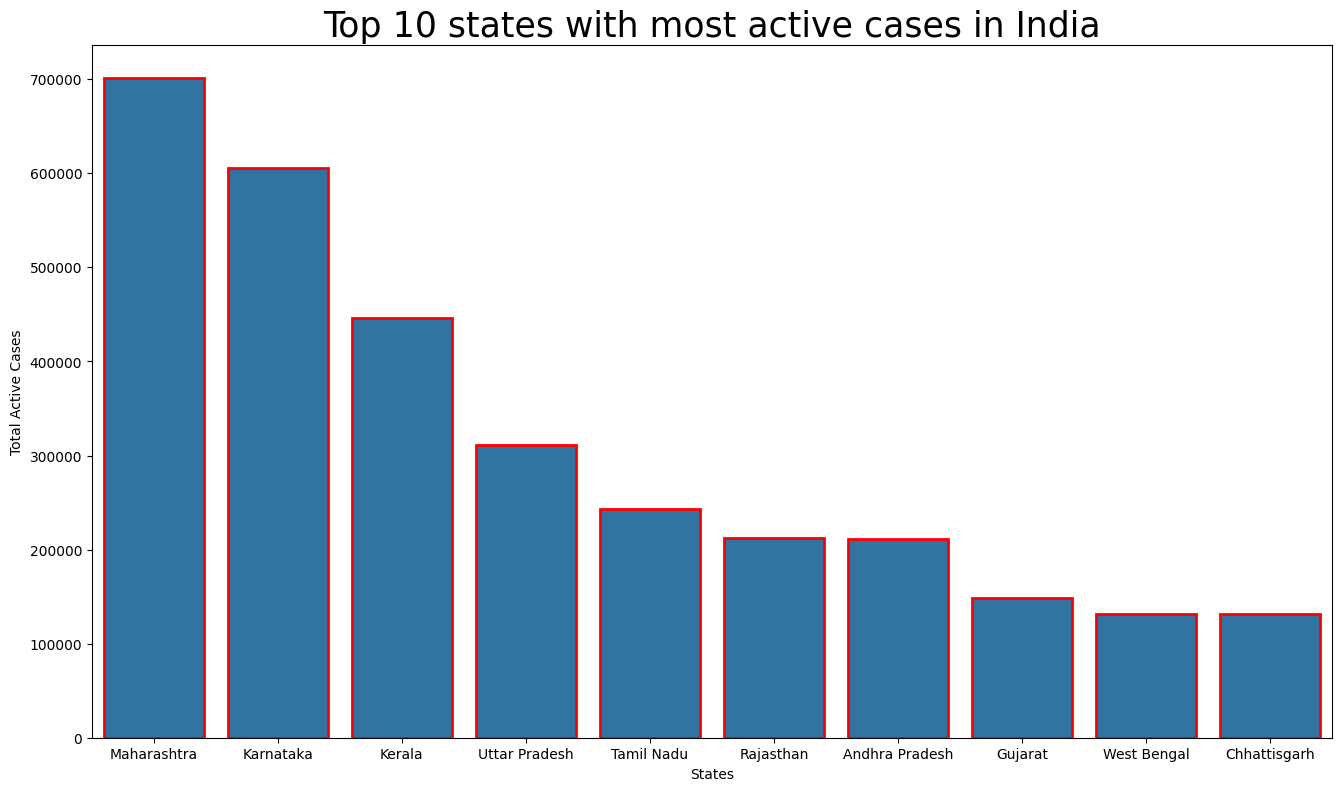

In [74]:
top_10_active_cases = covid_df.groupby(by="State/UnionTerritory").max()[['Active_Cases', 'Date']].sort_values(by=['Active_Cases'], ascending= False).reset_index()
fig = plt.figure(figsize=(16,9))
plt.title("Top 10 states with most active cases in India", size = 25)
ax = sns.barplot(data= top_10_active_cases.iloc[:10], y = "Active_Cases", x = "State/UnionTerritory", linewidth = 2, edgecolor='red')

plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()